* Look at big picture
* Get data
* Visualize data to gain insights
* Prepare data for ML
* Select model and train
* Fine-tune model
* Present solution
* Launch, monitor, and maintain

## The big picture

My task is to build a model of box office revenue for movies from The Movie Database. The results of this model would feed into a decision-making algorithm that a big movie theater chain uses to select which movies to run. The output of this supervised regression is critical to optimizing ticket revenue for your employer.

Current estimations are currently done mainly by intuition and checking buzz.

### Check assumptions

I'm going to build a model off of these movies titles to build a box office forecast for future movies. 

* Does this need to be a regression task?
* Should it be online? Or is it okay that it's offline?
* How expansive is this data? Is it enough to make statements about other movies, or should more data be collected?
* Are these titles are representative of the full gamut of movies?
* Are movie-going patterns the same today that they were 10 years ago? Will be the same that they are 10 years later?

I'm going to treat this as a continuous regression task. It's possible to run this as a classification task or interval regression task as well.

I'm going to run it offline and in batch since the data isn't so big; if I were to deploy this project I would set it up as an online learning problem. There probably isn't enough data to make broader generalizations. And if we were to deploy, weighting movies that are more recent is a good idea as media consumption has changed significantly in just the past five years.

## Get the data

This data comes from a [Kaggle competition](https://www.kaggle.com/c/tmdb-box-office-prediction/data) hosted by TMDB.

In [3]:
import pandas as pd

In [5]:
## renamed the training data to TMDB_movie_data.csv, and stored it in a local folder called Data
movies = pd.read_csv("../Data/TMDB_movie_data.csv")
movies.shape

(3000, 23)

There's only 3000 samples of training data, which seems a bit scarce.

In [6]:
movies.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


`popularity` is an attribute that probably wouldn't normally be available prior to release, but I want to predict the box office without knowing any future information about a movie.

In [13]:
movies.drop('popularity',axis=1,inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                  

In [14]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [15]:
movies.describe()

,id,budget,runtime,revenue
count,3000.000000,3.000000e+03,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,107.856571,6.672585e+07
std,866.169729,3.702609e+07,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,338.000000,1.519558e+09


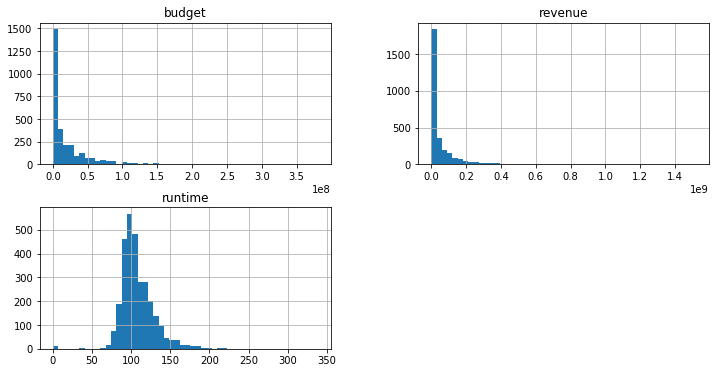

In [24]:
import matplotlib.pyplot as plt
movies[['budget','runtime','revenue']].hist(bins=50,figsize=(12,6));
plt.show()

It seems like budget generally outpaces revenue, since it's on a larger scale. Both budget and revenue are right-tailed.

Average movie length is around 100 minutes.

## Split the data

Since budget is important to predicting revenue, I'll make sure the testrepresentative of the budget distribution with stratified k-fold sampling. 

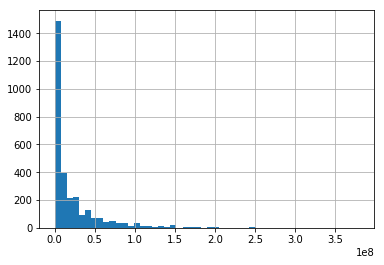

In [33]:
movies['budget'].hist(bins=50);

I'm going to cut movies into different groups based on budget.

In [ ]:
movies['budget_cat'] = np.ceil(movies['budget_cat'])